In [1]:
#alternative to taylor plots
from netCDF4 import Dataset
import numpy as  np
import matplotlib.pyplot as plt
import geopandas as gpd

import glob
import os.path
import h5py
import sys
sys.path.insert(0, '/home/g/g260204/tools/python_skripts/SchismUtils/')
from schism_utils import read_data, sort_files
sys.path.insert(0, '/home/g/g260204/tools/python_skripts/SkillMetrics/')
from skill_metrics import  plot_taylor_axes, get_taylor_diagram_axes,get_taylor_diagram_options

from matplotlib import rcParams
rcParams['figure.dpi'] = 300

import pandas as pd

In [2]:
h5pat = '/work/gg0877/g260204/data/pickle_files/'
shift = [[+1,20],[+1,20],[+1,20],[1,20],[1,20],[+1,30]]
rname= ["srm024_2010","srm024_2011","srm024_2012","srm024_2013","srm024_2014","srm024_2015"]
plotname = "srm024"

plot_path = "/work/gg0877/g260204/sim_data/SR5yr/plots/plots/" + plotname +'/'

In [3]:
def overlay_lines(ax,xticks,rmax,linestyle):
    for i in range(1,len(xticks)-1):
        ax.plot([0,xticks[i]],[0,rmax],'#6f6ff7',linewidth=0.5,linestyle=linestyle)

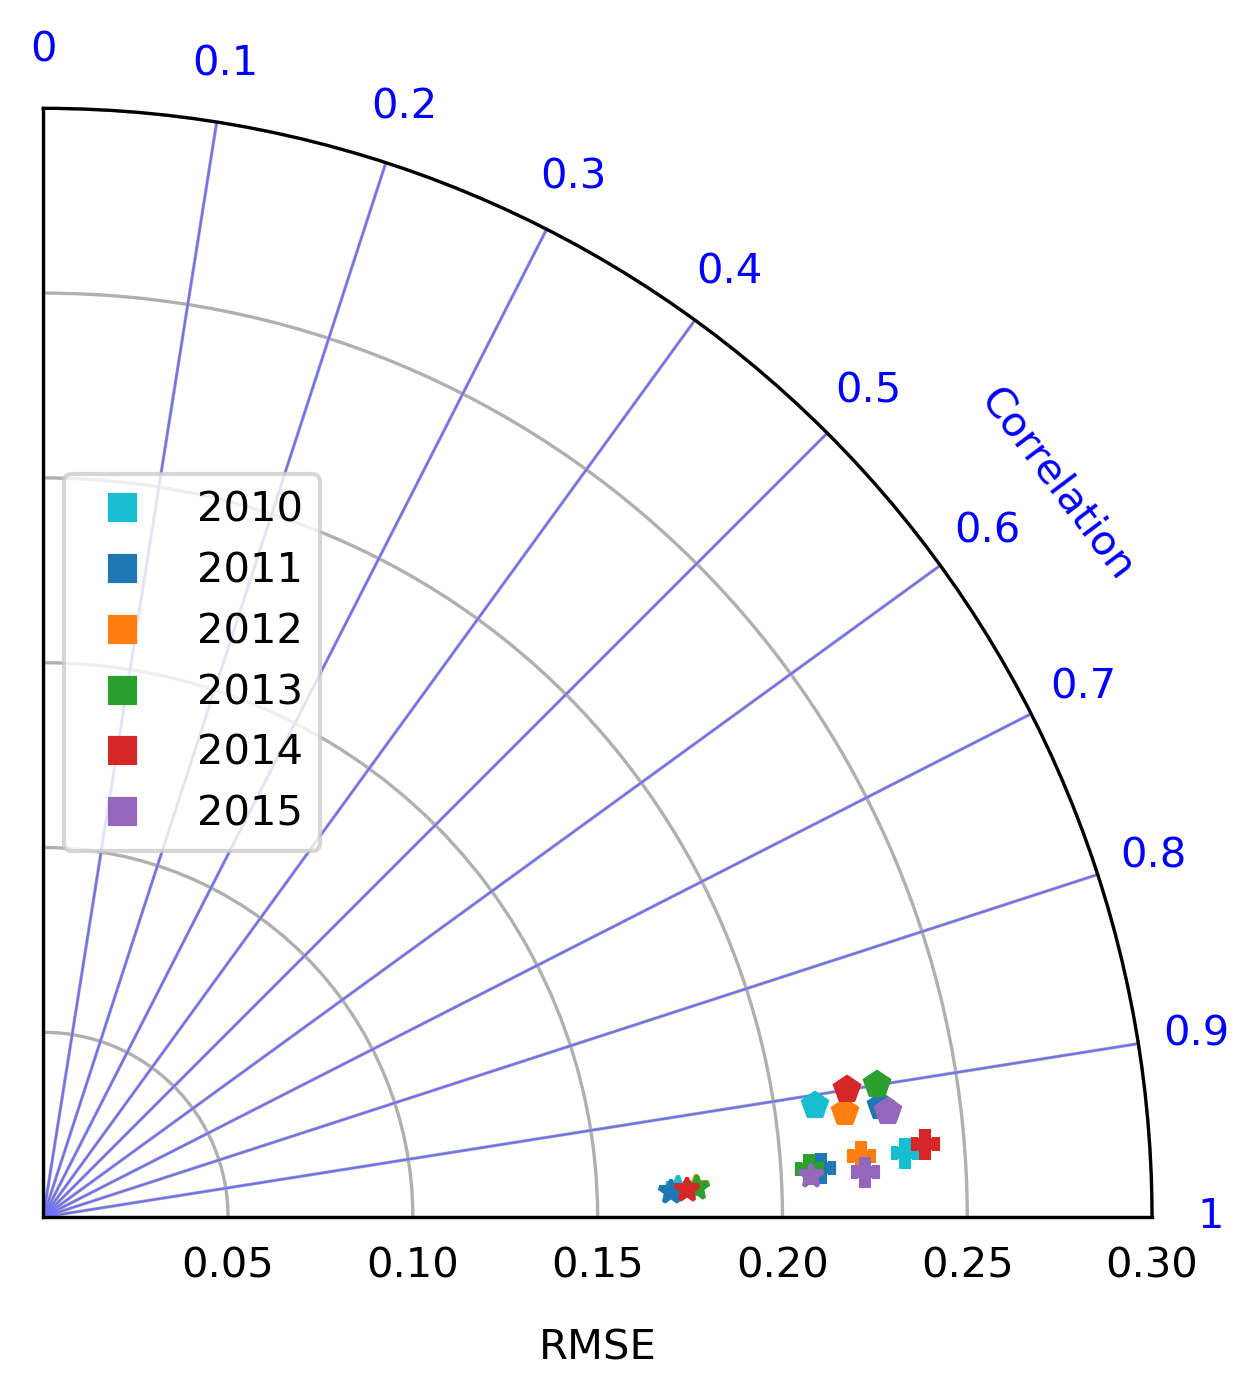

In [4]:
cols = plt.rcParams['axes.prop_cycle'].by_key()['color']
fmt =['.','*','P','^','p']
xticks = np.pi/2*(1-np.array([1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0]))
#xticks = np.arccos([1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0])
#subticks = np.arccos([0,0.85,0.95,0.98,0.99,1])
rmax = 0.3

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
overlay_lines(ax,xticks,rmax,'-')
#overlay_lines(ax,subticks,rmax,'--')
for i in range(0,len(rname)):
    tay = pd.read_hdf(h5pat + 'taylor_' + rname[i] + '_'+str(shift[i])+'.hdf5',key='taylor')
    rho,theta = tay['rmse'],np.pi/2*(1-np.array(tay['cors']))
    #rho,theta = tay['rmse'],np.arccos(list(tay['cors']))
    for p in [0,1,2,4]:
        if p == 0:
            ax.plot(theta[p], rho[p],color=cols[i-1],label=rname[i][-4:],marker = 's',linestyle='')
        else:
            ax.plot(theta[p], rho[p],color=cols[i-1],marker = fmt[p])
                
        
ax.set_rmax(rmax)
ax.set_rticks([0.05,0.1,0.15,0.2,0.25,0.3])  # Less radial ticks
ax.set_rlabel_position(0)  # Move radial labels away from plotted line
ax.set_thetamin(0)
ax.set_thetamax(90)
ax.set_xticks(xticks)
ax.set_xticklabels([1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0])
ax.set_xlabel('RMSE')
ax.xaxis.set_label_coords(0.5,-0.1)

ax.set_ylabel('Correlation',rotation = -53)
ax.yaxis.set_label_coords(0.9,0.65)
ax.yaxis.label.set_color('blue')
ax.tick_params(axis='x',colors='blue')
ax.legend(loc='center left')
plt.savefig(plot_path + '/taylor_like_all.png')

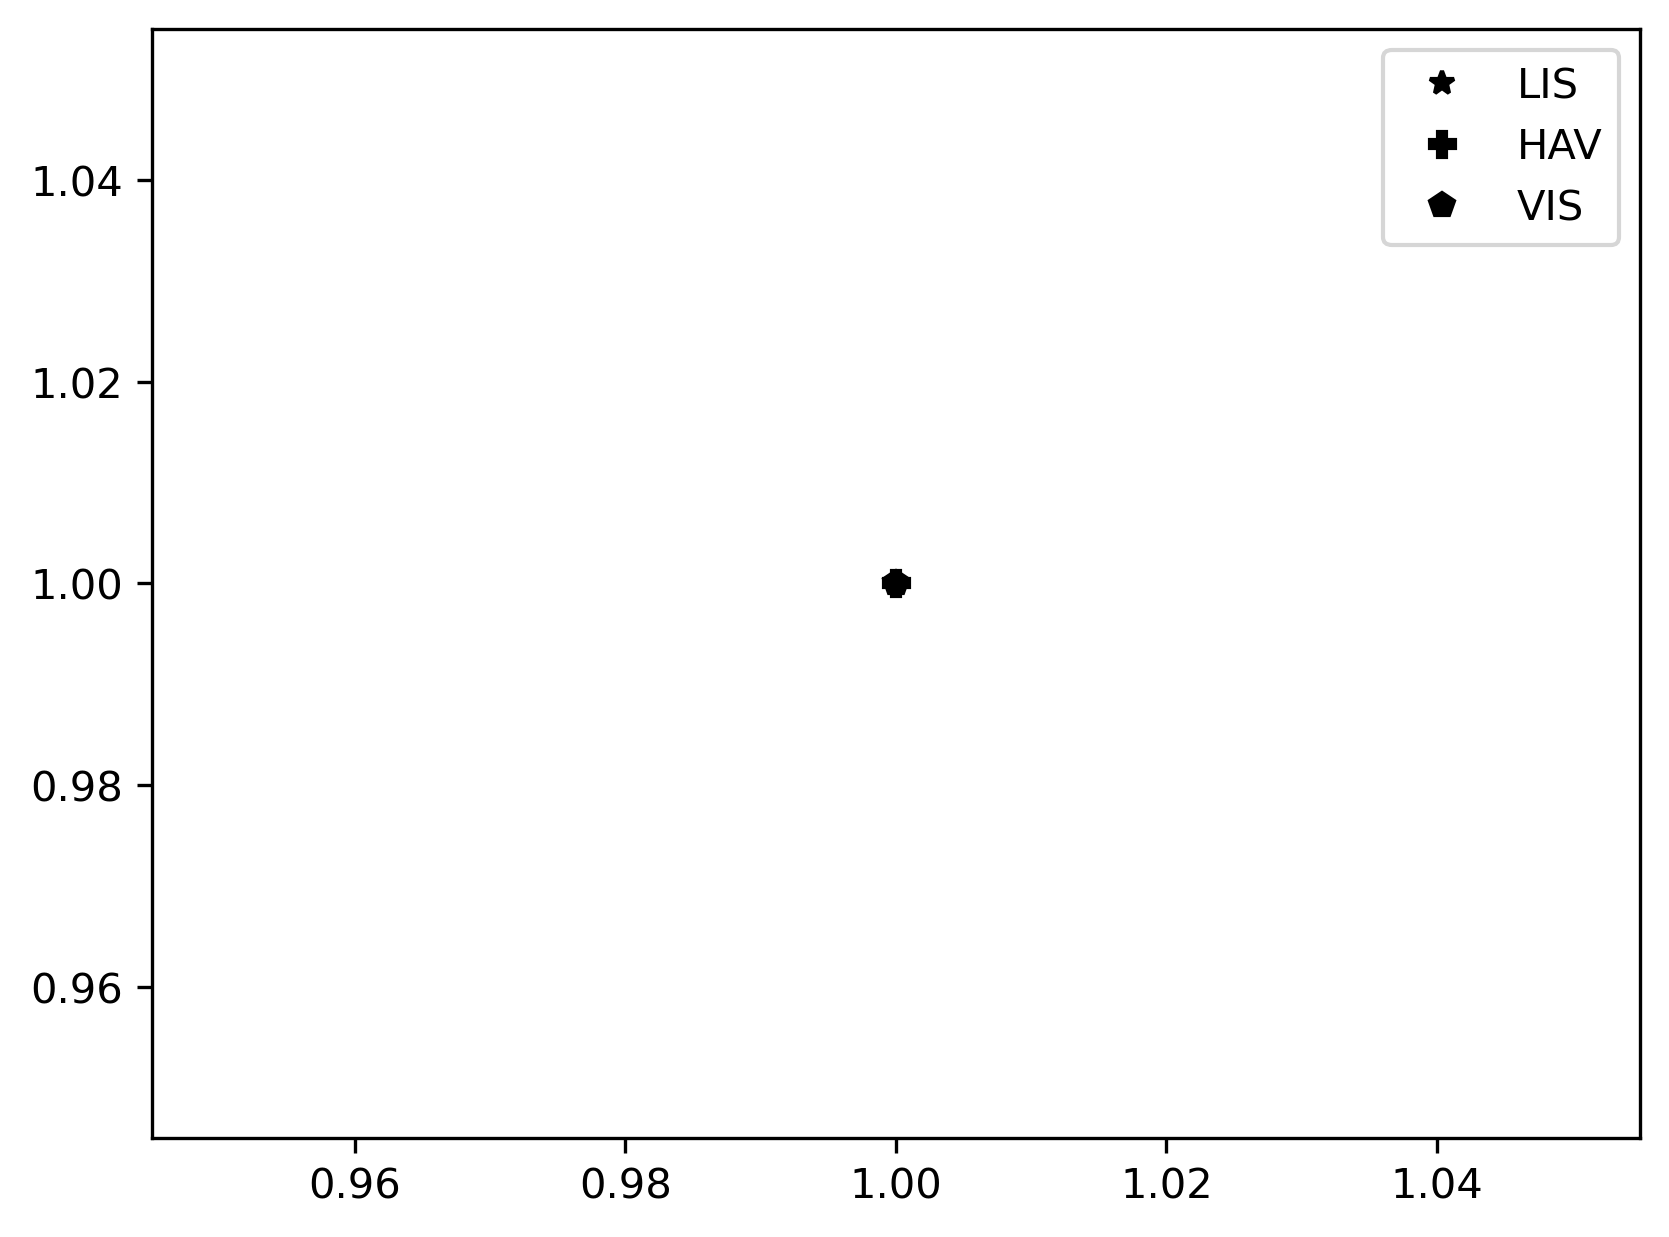

In [5]:
for p in [1,2,4]:
    plt.plot(1,1,color='k',marker=fmt[p],linestyle='')
plt.legend(tay.index[1:])

In [6]:
tay.index

Index(['obs', 'LIS', 'HAV', 'VIS', 'BAS'], dtype='object')